# 🔹 Phase 4: Training on Real Data

## 🎯 Concepts Covered

- **Loading & Preprocessing Data** (Normalization, One-Hot Encoding)
- **Loss Functions & Optimizers** (Categorical Cross-Entropy, Adam)
- **Model Training & Evaluation**
- **Visualizing Predictions**

# 📝 Exercise 04: Train a Neural Network on MNIST

## ✅ Task

- Build a **fully connected neural network (MLP)** to classify MNIST digits (0-9).
- Use **TensorFlow/Keras**.
- Train the model and evaluate its accuracy.
- Visualize some **predictions**.

## ✅ Step 1: Verify GPU Availability

Run this first to confirm TensorFlow detects the Metal GPU:

In [1]:
import tensorflow as tf

# Print the TensorFlow version to verify the installation
print("TensorFlow Version:", tf.__version__)

# Check and print the number of available GPUs
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Check and print the number of available CPUs
print("Num CPUs Available:", len(tf.config.list_physical_devices('CPU')))

# Check and print the number of available TPUs (if any)
print("Num TPUs Available:", len(tf.config.list_physical_devices('TPU')))

# Check and print the number of XLA (Accelerated Linear Algebra) enabled GPUs
print("Num XLA Enabled GPUs Available:", len(tf.config.list_physical_devices('XLA_GPU')))

# Check and print the number of XLA enabled TPUs (if available)
print("Num XLA Enabled TPUs Available:", len(tf.config.list_physical_devices('XLA_TPU')))

# Check and print the number of XLA enabled CPUs
print("Num XLA Enabled CPUs Available:", len(tf.config.list_physical_devices('XLA_CPU')))

# Check and print the total number of XLA-enabled devices (including CPU, GPU, TPU)
print("Num XLA Enabled Devices Available:", len(tf.config.list_physical_devices('XLA')))


TensorFlow Version: 2.16.2
Num GPUs Available: 1
Num CPUs Available: 1
Num TPUs Available: 0
Num XLA Enabled GPUs Available: 0
Num XLA Enabled TPUs Available: 0
Num XLA Enabled CPUs Available: 0
Num XLA Enabled Devices Available: 0


## ✅ Step 2: Enable Mixed Precision for Speed Boost

Apple’s Metal backend runs better with float16, so enable mixed precision:

In [3]:
from tensorflow.keras.mixed_precision import set_global_policy

# Enable mixed precision training, which uses float16 computations where possible 
# to improve performance on GPUs with Tensor Cores (like NVIDIA RTX and A100 series)
set_global_policy('mixed_float16')

# Print confirmation message
print("Mixed Precision Enabled!")


Mixed Precision Enabled!


## ✅ Step 3: Load and Preprocess the MNIST Dataset

Now, let’s train on MNIST, a common dataset for handwritten digit classification.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the image pixel values to the range [0, 1] (original range: 0-255)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data to fit CNN input format (batch_size, height, width, channels)
# Adding a single channel since MNIST images are grayscale
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32")
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32")

# Convert labels to one-hot encoding (categorical format) for classification
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Print dataset shapes to verify correct processing
print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels Shape: {y_test.shape}")


Training Data Shape: (60000, 28, 28, 1), Labels Shape: (60000, 10)
Testing Data Shape: (10000, 28, 28, 1), Labels Shape: (10000, 10)


## ✅ Step 4: Define an Optimized Neural Network

Now, let’s define a **Convolutional Neural Network (CNN)** using **Metal acceleration**:

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the Convolutional Neural Network (CNN) model
model = Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Explicit input layer for 28x28 grayscale images

    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, kernel_size=(3, 3), activation='relu'),

    # First max-pooling layer: 2x2 pooling size (reduces spatial dimensions)
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer: 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # Second max-pooling layer: 2x2 pooling size
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a 1D vector for fully connected layers
    Flatten(),

    # Fully connected dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),

    # Dropout layer (50% neurons randomly dropped during training to reduce overfitting)
    Dropout(0.5),

    # Output layer: 10 neurons (one for each digit 0-9) with softmax activation
    Dense(10, activation='softmax', dtype='float32')  # dtype='float32' for numerical stability
])

# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print a summary of the model architecture
model.summary()


2025-03-15 19:46:44.622508: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-03-15 19:46:44.622542: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-15 19:46:44.622556: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-15 19:46:44.622582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-15 19:46:44.622595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## ✅ Step 5: Optimize Training with `@tf.function`

For better performance, wrap the training step in `@tf.function`:

In [6]:
@tf.function  # Converts function into a TensorFlow graph for optimized execution
def train_step(X, y):
    """
    Performs a single training step (one batch) on the model.

    Args:
    X (tensor): Input batch of training data.
    y (tensor): Corresponding batch of labels.

    Returns:
    Loss and accuracy of the model on the given batch.
    """
    return model.train_on_batch(X, y)  # Train the model on one batch of data


## ✅ Step 6: Train the Model

Use a **larger batch size** to utilize the **M1 Pro GPU** fully.

In [7]:
# Train the Model
history = model.fit(
    X_train, y_train,  # Training data and corresponding labels
    batch_size=64,  # Number of samples per batch (optimized for performance)
    epochs=10,  # Train for 10 iterations over the entire dataset
    validation_data=(X_test, y_test)  # Evaluate performance on the test set after each epoch
)


Epoch 1/10


2025-03-15 19:47:06.001567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.8029 - loss: 0.6209 - val_accuracy: 0.9767 - val_loss: 0.0838
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9625 - loss: 0.1470 - val_accuracy: 0.9839 - val_loss: 0.0594
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9700 - loss: 0.1172 - val_accuracy: 0.9843 - val_loss: 0.0601
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9752 - loss: 0.1004 - val_accuracy: 0.9893 - val_loss: 0.0422
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9768 - loss: 0.0980 - val_accuracy: 0.9871 - val_loss: 0.0542
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9758 - loss: 0.1138 - val_accuracy: 0.9897 - val_loss: 0.0522
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9777 - loss: 0.1356 - val_accuracy: 0.9884 - val_loss: 0.0627
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9766 - loss: 0.1517 - val_accurac

## ✅ Step 7: Evaluate and Visualize Results

313/313 - 4s - 12ms/step - accuracy: 0.9882 - loss: 0.1134
Test Accuracy: 0.9882


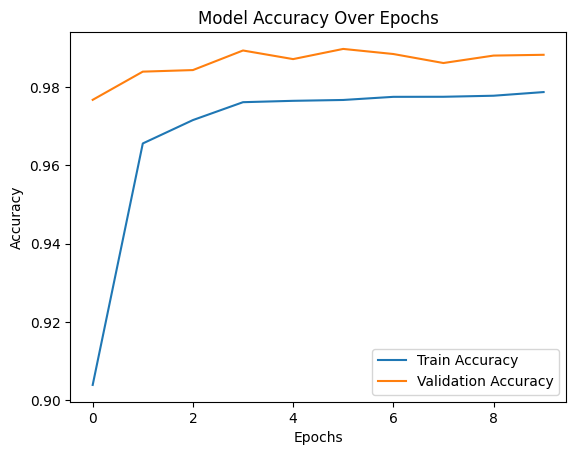

In [8]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)  
print(f"Test Accuracy: {test_acc:.4f}")  # Print the final test accuracy

# Plot training history to visualize accuracy trends
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Validation accuracy over epochs
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.legend()  # Show legend for train/validation accuracy
plt.title("Model Accuracy Over Epochs")  # Title of the plot
plt.show()  # Display the accuracy plot


## ✅ Optimizations Applied

1. **GPU Verification** (tf.config.list_physical_devices('GPU')).
2. **Mixed Precision** (set_global_policy('mixed_float16')).
3. **Efficient Data Preprocessing** (Normalizing + Reshaping).
4. **Optimized CNN Architecture** with Dropout for generalization.
5. **Larger Batch Size** (batch_size=64).
6. **`@tf.function` Training Step** (train_step for speedup).

This should now fully utilize the Apple M1 Pro’s Metal GPU backend for faster training! 🚀

## 🎯 Assignment 04

Now that you have trained the model, try the following:

- **Reduce the number of neurons in hidden layers** (e.g., 64 → 32).
- **Increase the epochs to 20** and observe if accuracy improves.
- **Try different activation functions** like `tanh` instead of `relu`.